# Ensemble Learning Methods Introduction

Supervised Learning

Group of predictors (classifiers / regressors)

### Bagging Machine Learning Algorithm

### **B**ootstrap **Agg**regat**ing** or [Bagging](https://en.wikipedia.org/wiki/Bootstrap_aggregating)
* [Scikit- Learn Reference](http://scikit-learn.org/stable/modules/ensemble.html#bagging)
* Bootstrap sampling: Sampling with replacement
* Combine by averaging the output (regression)
* Combine by voting (classification)
* Can be applied to many classifiers which includes ANN, CART, etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = sns.load_dataset('titanic')

### Exploratory Data Analysis

In [4]:
df.shape

(891, 15)

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


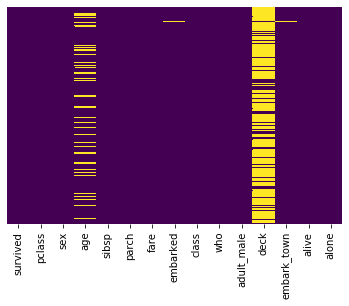

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

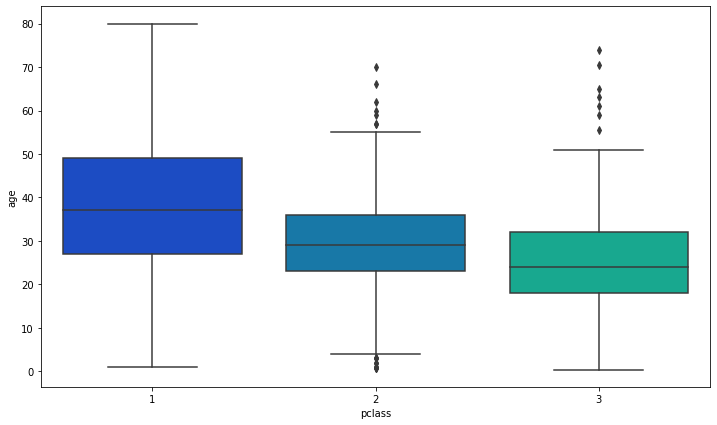

In [7]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='pclass', y='age', data=df, palette='winter')

In [8]:
df.groupby('pclass')['age'].mean()

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64

In [9]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):

        if pclass == 1:
            return 38

        elif pclass == 2:
            return 30

        else:
            return 25

    else:
        return age

In [10]:
df['age'] = df[['age', 'pclass']].apply(impute_age, axis=1)

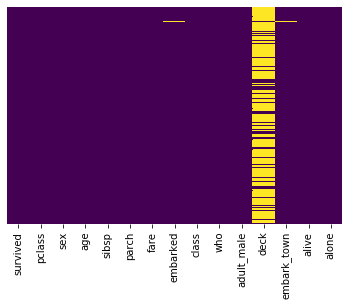

In [11]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [12]:
cols = ['deck', 'alone', 'alive', 'embark_town', 'adult_male', 'who', 'class']
df.drop(cols, axis=1, inplace=True)

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(889, 8)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
survived    889 non-null int64
pclass      889 non-null int64
sex         889 non-null object
age         889 non-null float64
sibsp       889 non-null int64
parch       889 non-null int64
fare        889 non-null float64
embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [16]:
df['pclass'].unique()

array([3, 1, 2])

In [17]:
df['pclass'].value_counts()

3    491
1    214
2    184
Name: pclass, dtype: int64

In [18]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [19]:
df['sex'].value_counts()

male      577
female    312
Name: sex, dtype: int64

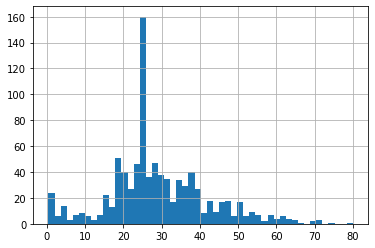

In [20]:
df['age'].hist(bins=50);

In [21]:
X = df.drop('survived', axis=1)

In [22]:
X = pd.get_dummies(X, columns=['sex', 'embarked'], drop_first=True)

In [23]:
X.head()

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [24]:
X.shape

(889, 8)

In [25]:
X.describe()

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.218414,0.524184,0.382452,32.096681,0.649044,0.086614,0.724409
std,0.834700,13.178017,1.103705,0.806761,49.697504,0.477538,0.281427,0.447063
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,3.000000,26.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,3.000000,36.500000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
pclass        889 non-null int64
age           889 non-null float64
sibsp         889 non-null int64
parch         889 non-null int64
fare          889 non-null float64
sex_male      889 non-null uint8
embarked_Q    889 non-null uint8
embarked_S    889 non-null uint8
dtypes: float64(2), int64(3), uint8(3)
memory usage: 44.3 KB


In [27]:
y = df['survived']

In [28]:
y.value_counts()

0    549
1    340
Name: survived, dtype: int64

# Fit Model

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [32]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
def print_score(clf, X, y, cv=0):
    
    y_pred = clf.predict(X)
    acc_score = accuracy_score(y, y_pred)
    clf_report = classification_report(y, y_pred)
    conf_matrix = confusion_matrix(y, y_pred)
                 
    print(f"Results:\n")
    print(f"accuracy score: {acc_score:.4f}\n")
    print(f"Classification Report: \n {clf_report}\n")
    print(f"Confusion Matrix: \n {conf_matrix}\n")

    if cv > 1:
        res = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
        print(f"Average Accuracy: \t {np.mean(res):.4f}")
        print(f"Accuracy SD: \t\t {np.std(res):.4f}")
        
 

### Decision Tree

In [34]:
clf = DecisionTreeClassifier(random_state=42)

In [35]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [36]:
print_score(clf, X_train, y_train, cv=10)

Results:

accuracy score: 0.9807

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       378
           1       0.99      0.96      0.97       244

    accuracy                           0.98       622
   macro avg       0.98      0.98      0.98       622
weighted avg       0.98      0.98      0.98       622


Confusion Matrix: 
 [[376   2]
 [ 10 234]]

Average Accuracy: 	 0.7670
Accuracy SD: 		 0.0321


In [37]:
print_score(clf, X_test, y_test) # Test

Results:

accuracy score: 0.7790

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.82      0.83       171
           1       0.69      0.70      0.69        96

    accuracy                           0.78       267
   macro avg       0.76      0.76      0.76       267
weighted avg       0.78      0.78      0.78       267


Confusion Matrix: 
 [[141  30]
 [ 29  67]]



***

### Bagging (oob_score=False)

In [38]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [39]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=42,
                                                        splitter='best'),
      

In [40]:
print_score(bag_clf, X_train, y_train, cv=10)

Results:

accuracy score: 0.9807

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       378
           1       0.99      0.96      0.98       244

    accuracy                           0.98       622
   macro avg       0.98      0.98      0.98       622
weighted avg       0.98      0.98      0.98       622


Confusion Matrix: 
 [[375   3]
 [  9 235]]

Average Accuracy: 	 0.7846
Accuracy SD: 		 0.0451


In [41]:
print_score(bag_clf, X_test, y_test)

Results:

accuracy score: 0.8502

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       171
           1       0.80      0.78      0.79        96

    accuracy                           0.85       267
   macro avg       0.84      0.84      0.84       267
weighted avg       0.85      0.85      0.85       267


Confusion Matrix: 
 [[152  19]
 [ 21  75]]



***

### Bagging (oob_score=True)

Use out-of-bag samples to estimate the generalization accuracy

In [42]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
                            bootstrap=True, oob_score=True,
                            n_jobs=-1, random_state=42)

In [43]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=42,
                                                        splitter='best'),
      

In [44]:
bag_clf.oob_score_

0.7813504823151125

In [45]:
print_score(bag_clf, X_train, y_train, cv=10)

Results:

accuracy score: 0.9807

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       378
           1       0.99      0.96      0.98       244

    accuracy                           0.98       622
   macro avg       0.98      0.98      0.98       622
weighted avg       0.98      0.98      0.98       622


Confusion Matrix: 
 [[375   3]
 [  9 235]]

Average Accuracy: 	 0.7846
Accuracy SD: 		 0.0451


In [46]:
print_score(bag_clf, X_test, y_test)

Results:

accuracy score: 0.8502

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       171
           1       0.80      0.78      0.79        96

    accuracy                           0.85       267
   macro avg       0.84      0.84      0.84       267
weighted avg       0.85      0.85      0.85       267


Confusion Matrix: 
 [[152  19]
 [ 21  75]]



***

### Random Forest
[paper](http://ect.bell-labs.com/who/tkh/publications/papers/odt.pdf)

* Ensemble of Decision Trees

* Training via the bagging method (Repeated sampling with replacement)
  * Bagging: Sample from samples
  * RF: Sample from predictors. $m=sqrt(p)$ for classification and $m=p/3$ for regression problems.

* Utilize uncorrelated trees

Random Forest
* Sample both observations and features of training data

Bagging
* Samples only observations at random
* Decision Tree select best feature when splitting a node

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf_clf = RandomForestClassifier(random_state=42)

In [49]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [50]:
print_score(rf_clf, X_train, y_train, cv=10)

Results:

accuracy score: 0.9566

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       378
           1       0.97      0.91      0.94       244

    accuracy                           0.96       622
   macro avg       0.96      0.95      0.95       622
weighted avg       0.96      0.96      0.96       622


Confusion Matrix: 
 [[372   6]
 [ 21 223]]

Average Accuracy: 	 0.7943
Accuracy SD: 		 0.0298


In [51]:
print_score(rf_clf, X_test, y_test)

Results:

accuracy score: 0.8090

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       171
           1       0.74      0.73      0.73        96

    accuracy                           0.81       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.81      0.81      0.81       267


Confusion Matrix: 
 [[146  25]
 [ 26  70]]



***
### Grid Search

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
rf_clf = RandomForestClassifier(random_state=42)

In [54]:
params_grid = {"max_depth": [3, 4, 5, None],
               "min_samples_split": [2, 3, 5, 10],
               "min_samples_leaf": [1, 3, 5, 10],
               "bootstrap": [True, False],
               "criterion": ['gini', 'entropy']}

In [55]:
grid_search = GridSearchCV(rf_clf, params_grid,
                           n_jobs=-1, cv=5,
                           verbose=1, scoring='accuracy')

In [56]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1257 out of 1280 | elapsed:    4.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:    4.2s finished
/Users/pramote/py374-venv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bo

In [57]:
grid_search.best_score_

0.815112540192926

In [58]:
grid_search.best_estimator_.get_params()

{'bootstrap': False,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [59]:
print_score(grid_search, X_train, y_train, cv=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Results:

accuracy score: 0.8408

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.96      0.88       378
           1       0.91      0.66      0.77       244

    accuracy                           0.84       622
   macro avg       0.86      0.81      0.82       622
weighted avg       0.85      0.84      0.83       622


Confusion Matrix: 
 [[361  17]
 [ 82 162]]

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 256 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 256 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 256 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 256 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 256 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 256 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 256 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 256 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 256 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.4s


Average Accuracy: 	 0.8087
Accuracy SD: 		 0.0240


[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:    4.1s finished


In [60]:
print_score(grid_search, X_test, y_test)

Results:

accuracy score: 0.8427

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       171
           1       0.84      0.70      0.76        96

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.84       267


Confusion Matrix: 
 [[158  13]
 [ 29  67]]



***

### Extra-Trees (Extremely Randomized Trees) Ensemble

[scikit-learn](http://scikit-learn.org/stable/modules/ensemble.html#bagging)

* Random Forest is build upon Decision Tree
* Decision Tree node splitting is based on gini or entropy or some other algorithms
* Extra-Trees make use of random thresholds for each feature unlike Decision Tree


In [61]:
from sklearn.ensemble import ExtraTreesClassifier

In [62]:
xt_clf = ExtraTreesClassifier(random_state=42)

In [63]:
xt_clf.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [64]:
print_score(xt_clf, X_train, y_train, cv=10)

Results:

accuracy score: 0.9807

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       378
           1       0.99      0.96      0.97       244

    accuracy                           0.98       622
   macro avg       0.98      0.98      0.98       622
weighted avg       0.98      0.98      0.98       622


Confusion Matrix: 
 [[376   2]
 [ 10 234]]

Average Accuracy: 	 0.7638
Accuracy SD: 		 0.0514


In [65]:
print_score(xt_clf, X_test, y_test)

Results:

accuracy score: 0.8165

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       171
           1       0.75      0.74      0.74        96

    accuracy                           0.82       267
   macro avg       0.80      0.80      0.80       267
weighted avg       0.82      0.82      0.82       267


Confusion Matrix: 
 [[147  24]
 [ 25  71]]



***

### Boosting (Hypothesis Boosting)

* Combine several weak learners into a strong learner. 

* Train predictors sequentially

### AdaBoost / Adaptive Boosting

[Robert Schapire](http://rob.schapire.net/papers/explaining-adaboost.pdf)

[Wikipedia](https://en.wikipedia.org/wiki/AdaBoost)

[Chris McCormick](http://mccormickml.com/2013/12/13/adaboost-tutorial/)

[Scikit Learn AdaBoost](http://scikit-learn.org/stable/modules/ensemble.html#adaboost)

1995

As above for Boosting:
* Similar to human learning, the algo learns from past mistakes by focusing more on difficult problems it did not get right in prior learning. 
* In machine learning speak, it pays more attention to training instances that previously underfitted.

Source: Scikit-Learn:

* Fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. 
* The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction.
* The data modifications at each so-called boosting iteration consist of applying weights $w_1, w_2, …, w_N$ to each of the training samples. 
* Initially, those weights are all set to $w_i = 1/N$, so that the first step simply trains a weak learner on the original data. 
* For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. 
* At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. 
* As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence.


In [66]:
from sklearn.ensemble import AdaBoostClassifier

In [67]:
ada_clf = AdaBoostClassifier()

In [68]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [69]:
print_score(ada_clf, X_train, y_train, cv=10)

Results:

accuracy score: 0.8280

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       378
           1       0.79      0.76      0.78       244

    accuracy                           0.83       622
   macro avg       0.82      0.82      0.82       622
weighted avg       0.83      0.83      0.83       622


Confusion Matrix: 
 [[330  48]
 [ 59 185]]

Average Accuracy: 	 0.7876
Accuracy SD: 		 0.0262


In [70]:
print_score(ada_clf, X_test, y_test)

Results:

accuracy score: 0.8165

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       171
           1       0.73      0.77      0.75        96

    accuracy                           0.82       267
   macro avg       0.80      0.81      0.80       267
weighted avg       0.82      0.82      0.82       267


Confusion Matrix: 
 [[144  27]
 [ 22  74]]



### AdaBoost with Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
ada_clf = AdaBoostClassifier(RandomForestClassifier())

In [73]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators='warn',
                     

In [74]:
print_score(ada_clf, X_train, y_train, cv=10)

Results:

accuracy score: 0.9807

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       378
           1       0.98      0.97      0.98       244

    accuracy                           0.98       622
   macro avg       0.98      0.98      0.98       622
weighted avg       0.98      0.98      0.98       622


Confusion Matrix: 
 [[373   5]
 [  7 237]]

Average Accuracy: 	 0.7670
Accuracy SD: 		 0.0269


In [75]:
print_score(ada_clf, X_test, y_test)

Results:

accuracy score: 0.8015

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       171
           1       0.72      0.73      0.73        96

    accuracy                           0.80       267
   macro avg       0.78      0.79      0.78       267
weighted avg       0.80      0.80      0.80       267


Confusion Matrix: 
 [[144  27]
 [ 26  70]]



***

### Gradient Boosting / Gradient Boosting Machine (GBM)

Works for both regression and classification

[Wikipedia](https://en.wikipedia.org/wiki/Gradient_boosting)

* Sequentially adding predictors
* Each one correcting its predecessor
* Fit new predictor to the residual errors

Compare this to AdaBoost: 
* Alter instance weights at every iteration


**Step 1. **

  $$Y = F(x) + \epsilon$$

**Step 2. **

  $$\epsilon = G(x) + \epsilon_2$$

  Substituting (2) into (1), we get:
  
  $$Y = F(x) + G(x) + \epsilon_2$$
    
**Step 3. **

  $$\epsilon_2 = H(x)  + \epsilon_3$$

Now:
  
  $$Y = F(x) + G(x) + H(x)  + \epsilon_3$$
  
Finally, by adding weighting  
  
  $$Y = \alpha F(x) + \beta G(x) + \gamma H(x)  + \epsilon_4$$

Gradient boosting involves three elements:

* **Loss function to be optimized**: Loss function depends on the type of problem being solved. In the case of regression problems, mean squared error is used, and in classification problems, logarithmic loss will be used. In boosting, at each stage, unexplained loss from prior iterations will be optimized rather than starting from scratch.

* **Weak learner to make predictions**: Decision trees are used as a weak learner in gradient boosting.

* **Additive model to add weak learners to minimize the loss function**: Trees are added one at a time and existing trees in the model are not changed. The gradient descent procedure is used to minimize the loss when adding trees.

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

In [77]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [78]:
print_score(gbc_clf, X_train, y_train, cv=10)

Results:

accuracy score: 0.9019

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       378
           1       0.93      0.81      0.87       244

    accuracy                           0.90       622
   macro avg       0.91      0.89      0.89       622
weighted avg       0.90      0.90      0.90       622


Confusion Matrix: 
 [[364  14]
 [ 47 197]]

Average Accuracy: 	 0.8216
Accuracy SD: 		 0.0323


In [79]:
print_score(gbc_clf, X_test, y_test)

Results:

accuracy score: 0.8464

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       171
           1       0.82      0.73      0.77        96

    accuracy                           0.85       267
   macro avg       0.84      0.82      0.83       267
weighted avg       0.85      0.85      0.84       267


Confusion Matrix: 
 [[156  15]
 [ 26  70]]



***

| Classifier | Decision Tree | Bagging | Random Forest | Optimised RF | Extra-Trees | AdaBoost (CART) | AdaBoost (RF) | Gradient Boosting |
|:-|:-|:- |:- |:- |:- |:-|:-| :- |
| Train accuracy score | 0.9920 | 0.9920 | 0.9775 | 0.9341 | 0.9920 | 0.8633 | 0.9920 | 0.9277 |
| Average accuracy score | 0.7894 | 0.8362 | 0.8168 | 0.8217 | 0.8136 | 0.8200 | 0.8183 | 0.8586 |
| SD | 0.0448 | 0.0283 | 0.0415 | 0.0330 | 0.0322 | 0.0520 | 0.0307 | 0.0252|
| Test accuracy score | 0.7640 | 0.8015 | 0.7828 | 0.7940 | 0.7715 | 0.7678 | 0.7715 | 0.7828 | 0.7828 |

***

### XGBoost (Extreme Gradient Boosting)

[Documentation](http://xgboost.readthedocs.io/en/latest/)

[tqchen github](https://github.com/tqchen/xgboost/tree/master/demo/guide-python)

[dmlc github](https://github.com/dmlc/xgboost)

* “Gradient Boosting” is proposed in the paper Greedy Function Approximation: A Gradient Boosting Machine, by Friedman. 
* XGBoost is based on this original model. 

* Supervised Learning

### Objective Function : Training Loss + Regularization

$$Obj(Θ)=L(θ)+Ω(Θ)$$

* $L$ is the training loss function, and 
* $Ω$ is the regularization term. 

### Training Loss

The training loss measures how predictive our model is on training data.

Example 1, Mean Squared Error for Linear Regression:

$$L(θ)= \sum_i(y_i-\hat{y}_i)^2$$

Example 2, Logistic Loss for Logistic Regression:

$$ L(θ) = \sum_i \large[ y_i ln(1 + e^{-\hat{y}_i}) + (1-y_i) ln(1 + e^{\hat{y}_i}) \large] $$

### Regularization Term

The regularization term controls the complexity of the model, which helps us to avoid overfitting. 

[XGBoost vs GBM](https://www.quora.com/What-is-the-difference-between-the-R-gbm-gradient-boosting-machine-and-xgboost-extreme-gradient-boosting/answer/Tianqi-Chen-1)

* Specifically,  xgboost used a more regularized model formalization to control over-fitting, which gives it better performance.

* For model, it might be more suitable to be called as regularized gradient boosting.

In [80]:
import xgboost as xgb

In [81]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3,
                            n_jobs=-1)

In [82]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [83]:
print_score(xgb_clf, X_train, y_train, cv=10)

Results:

accuracy score: 0.9775

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       378
           1       0.99      0.95      0.97       244

    accuracy                           0.98       622
   macro avg       0.98      0.97      0.98       622
weighted avg       0.98      0.98      0.98       622


Confusion Matrix: 
 [[375   3]
 [ 11 233]]

Average Accuracy: 	 0.7732
Accuracy SD: 		 0.0318


In [84]:
print_score(xgb_clf, X_test, y_test)

Results:

accuracy score: 0.8315

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.85      0.87       171
           1       0.75      0.80      0.77        96

    accuracy                           0.83       267
   macro avg       0.82      0.83      0.82       267
weighted avg       0.84      0.83      0.83       267


Confusion Matrix: 
 [[145  26]
 [ 19  77]]

